In [53]:
# Import Pandas, numpy, matplotlib, seaborn and scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression


In [59]:
# Set up matplotlib to display plots inline
%matplotlib inline

In [61]:
# Load the "National River Toxin Dataset" CSV file into the DataFrame
df=pd.read_csv('C:/Users/sjsco/Desktop/Datasets/National_River_Toxin_Dataset_1.csv')

In [63]:
# Display the first few rows of the data using head()
df.head()

,Date,River_System,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
0,2018-01-01,Amazon,7.030015,19.136212,2.500401,0.465454,3.578886,11.627614,0.522167,7.830196
1,2018-01-01,Nile,7.421766,21.406824,3.469443,0.859716,5.352155,10.538171,0.510465,8.130328
2,2018-01-01,Yangtze,7.133612,18.419902,3.806935,0.824085,5.277814,7.865033,0.585096,8.120874
3,2018-01-01,Mississippi,7.863001,18.014871,3.438131,0.500597,3.473881,11.143068,0.438248,6.853816
4,2018-01-01,Danube,7.527686,16.622289,2.188210,0.424178,2.454209,8.043467,0.422244,8.197925


In [67]:
# Check the shape of the DataFrame
print(df.shape)

(1305, 10)


In [69]:
# Display info about the DataFrame using info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1305 non-null   object 
 1   River_System      1305 non-null   object 
 2   pH_Level          1278 non-null   float64
 3   Temperature       1278 non-null   float64
 4   Lead              1285 non-null   float64
 5   Mercury           1278 non-null   float64
 6   Arsenic           1279 non-null   float64
 7   Nitrates          1265 non-null   float64
 8   Phosphates        1282 non-null   float64
 9   Dissolved_Oxygen  1284 non-null   float64
dtypes: float64(8), object(2)
memory usage: 102.1+ KB


In [71]:
# Generate descriptive statistics using describe()
df.describe()

,pH_Level,Temperature,Lead,Mercury,Arsenic,Nitrates,Phosphates,Dissolved_Oxygen
count,1278.000000,1278.000000,1285.000000,1278.000000,1279.000000,1265.000000,1282.000000,1284.000000
mean,7.353247,20.041668,3.011035,0.596108,3.597916,10.038789,0.497162,8.023795
std,0.349114,4.063638,0.874431,0.175150,0.992052,2.096641,0.106304,1.064190
min,6.465087,9.891618,0.551349,0.157117,1.485608,2.025075,0.144044,5.041394
25%,7.101324,16.813976,2.366298,0.462683,2.836160,8.701188,0.422006,7.269386
50%,7.339326,20.039121,3.000714,0.599186,3.511678,10.089112,0.497631,8.007448
75%,7.585733,23.358634,3.676560,0.734863,4.298946,11.391686,0.572888,8.740828
max,8.392902,30.749449,5.800963,1.057494,6.232902,16.547073,0.870007,11.228677


In [73]:
# Check for missing values
print(df.isnull().sum())

Date                 0
River_System         0
pH_Level            27
Temperature         27
Lead                20
Mercury             27
Arsenic             26
Nitrates            40
Phosphates          23
Dissolved_Oxygen    21
dtype: int64


In [140]:
# Handle any missing or inconsistent data
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Replaced each value with the mean so should show 0 for each now
print(df.isnull().sum())

Date                0
River_System        0
pH_Level            0
Temperature         0
Lead                0
Mercury             0
Arsenic             0
Nitrates            0
Phosphates          0
Dissolved_Oxygen    0
dtype: int64


In [81]:
# Convert any data types if necessary
df['Date'] = pd.to_datetime(df['Date'])

In [134]:
# Calculate average levels of toxins
average_toxin_levels = df[['Lead', 'Mercury', 'Arsenic']].mean()
print(f"Average Toxin Levels:\n{average_toxin_levels}")

Average Toxin Levels:
Lead       3.011035
Mercury    0.596108
Arsenic    3.597916
dtype: float64


In [187]:
# Identify top polluted rivers by lead levels
top_polluted_rivers_lead= df.groupby('River_System')['Lead'].mean().sort_values(ascending=False)
print(f"Top Polluted Rivers by Lead Levels:\n{top_polluted_rivers_lead.head()}")

Top Polluted Rivers by Lead Levels:
River_System
Yangtze        4.011200
Mississippi    3.478198
Nile           2.990203
Danube         2.544912
Amazon         2.030662
Name: Lead, dtype: float64


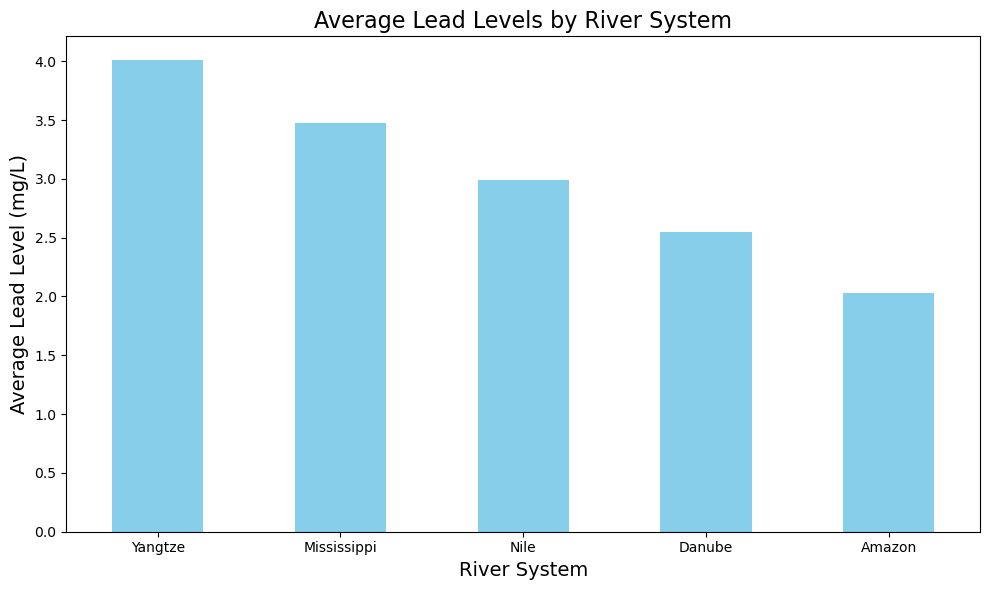

In [191]:
# Bar chart for average lead levels per river
plt.figure(figsize=(10, 6))
top_polluted_rivers_lead.plot(kind='bar', color='skyblue')
plt.title('Average Lead Levels by River System', fontsize=16)
plt.xlabel('River System', fontsize=14)
plt.ylabel('Average Lead Level (mg/L)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

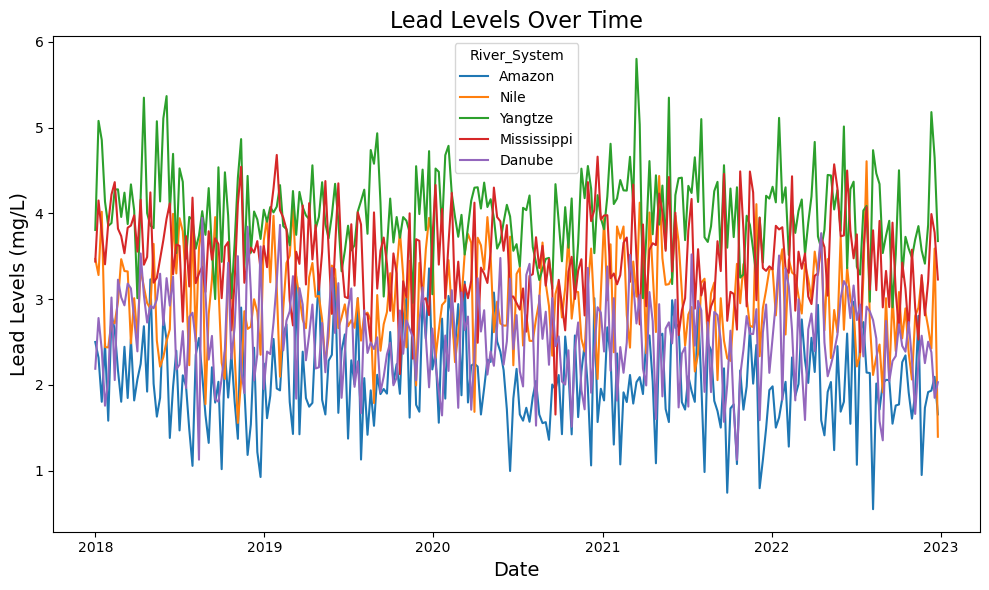

In [193]:
# Line graph for toxin levels over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Lead', data=df, hue='River_System', errorbar=None)
plt.title('Lead Levels Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Lead Levels (mg/L)', fontsize=14)
plt.tight_layout()
plt.show()

In [196]:
# Identify top polluted rivers by Mercury levels
top_polluted_rivers_mercury= df.groupby('River_System')['Mercury'].mean().sort_values(ascending=False)
print(f"Top Polluted Rivers by Mercury Levels:\n{top_polluted_rivers_mercury.head()}")

Top Polluted Rivers by Mercury Levels:
River_System
Yangtze        0.784567
Nile           0.706638
Mississippi    0.598506
Amazon         0.493555
Danube         0.397276
Name: Mercury, dtype: float64


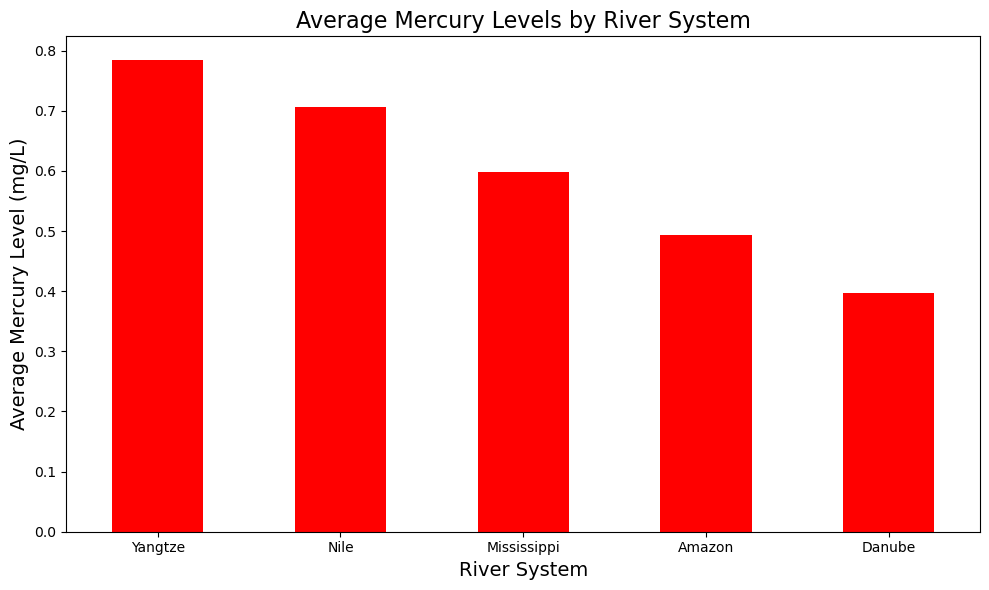

In [202]:
# Bar chart for average Mercury levels per river
plt.figure(figsize=(10, 6))
top_polluted_rivers_mercury.plot(kind='bar', color='red')
plt.title('Average Mercury Levels by River System', fontsize=16)
plt.xlabel('River System', fontsize=14)
plt.ylabel('Average Mercury Level (mg/L)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

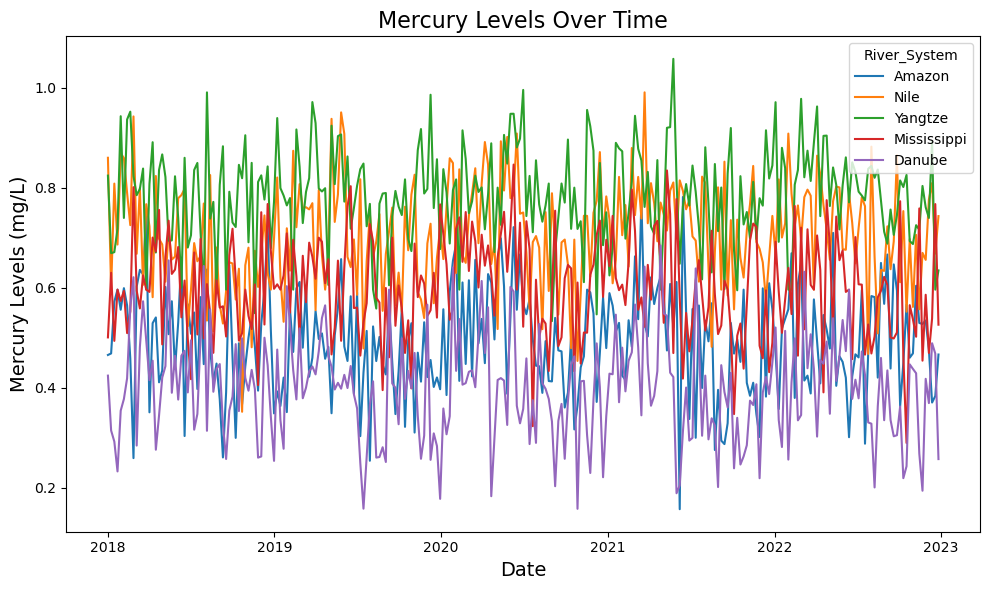

In [227]:
# Line graph for toxin levels over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Mercury', data=df, hue='River_System', errorbar=None)
plt.title('Mercury Levels Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Mercury Levels (mg/L)', fontsize=14)
plt.tight_layout()
plt.show()

In [198]:
# Identify top polluted rivers by Arsenic levels
top_polluted_rivers_arsenic= df.groupby('River_System')['Arsenic'].mean().sort_values(ascending=False)
print(f"Top Polluted Rivers by Arsenic Levels:\n{top_polluted_rivers_arsenic.head()}")

Top Polluted Rivers by Arsenic Levels:
River_System
Yangtze        4.969918
Nile           3.987877
Mississippi    3.492969
Amazon         3.021498
Danube         2.517318
Name: Arsenic, dtype: float64


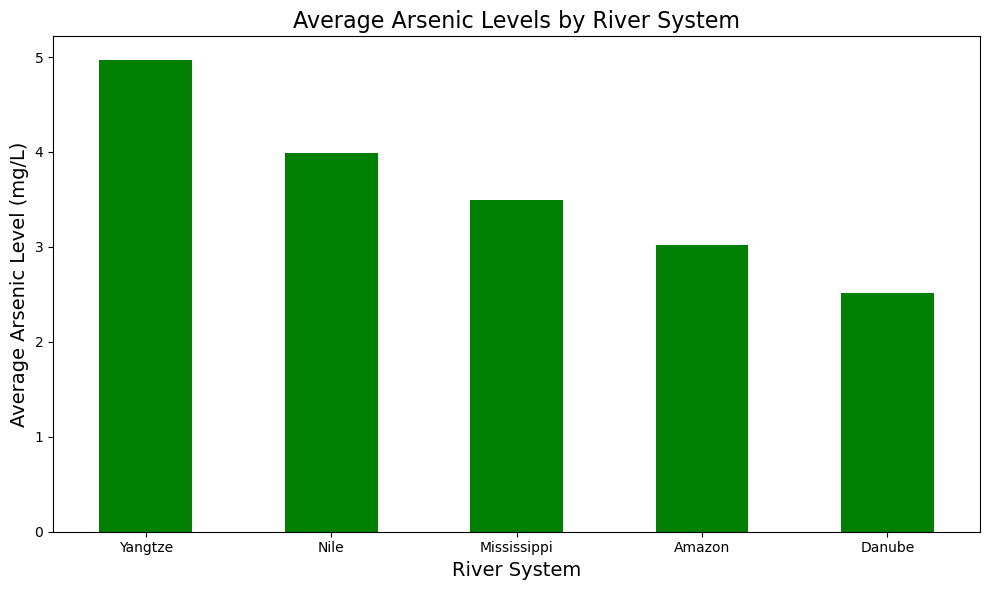

In [221]:
# Bar chart for average Arsenic levels per river
plt.figure(figsize=(10, 6))
top_polluted_rivers_arsenic.plot(kind='bar', color='green')
plt.title('Average Arsenic Levels by River System', fontsize=16)
plt.xlabel('River System', fontsize=14)
plt.ylabel('Average Arsenic Level (mg/L)', fontsize=14)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

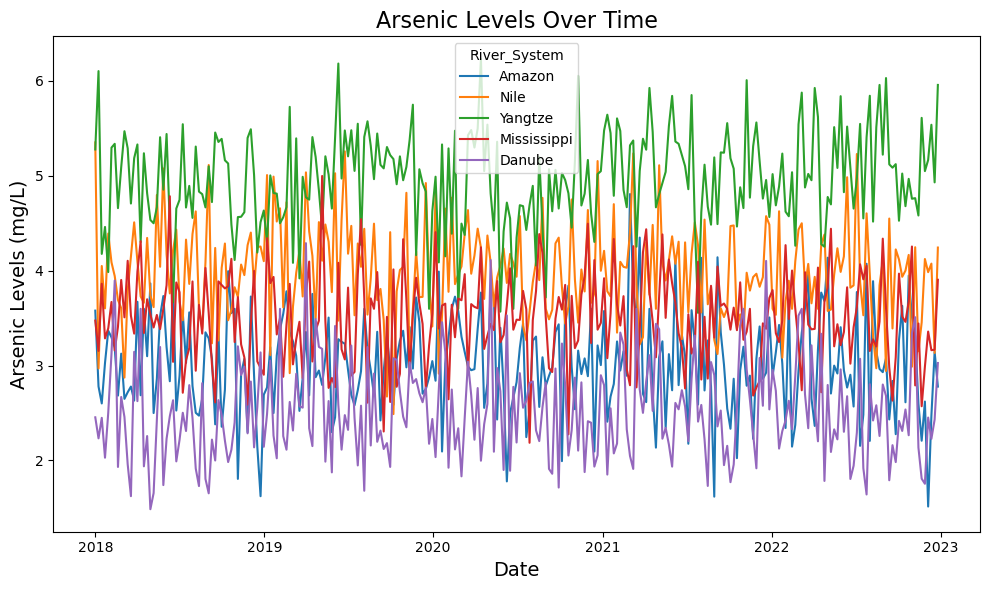

In [229]:
# Line graph for toxin levels over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Arsenic', data=df, hue='River_System', errorbar=None)
plt.title('Arsenic Levels Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Arsenic Levels (mg/L)', fontsize=14)
plt.tight_layout()
plt.show()

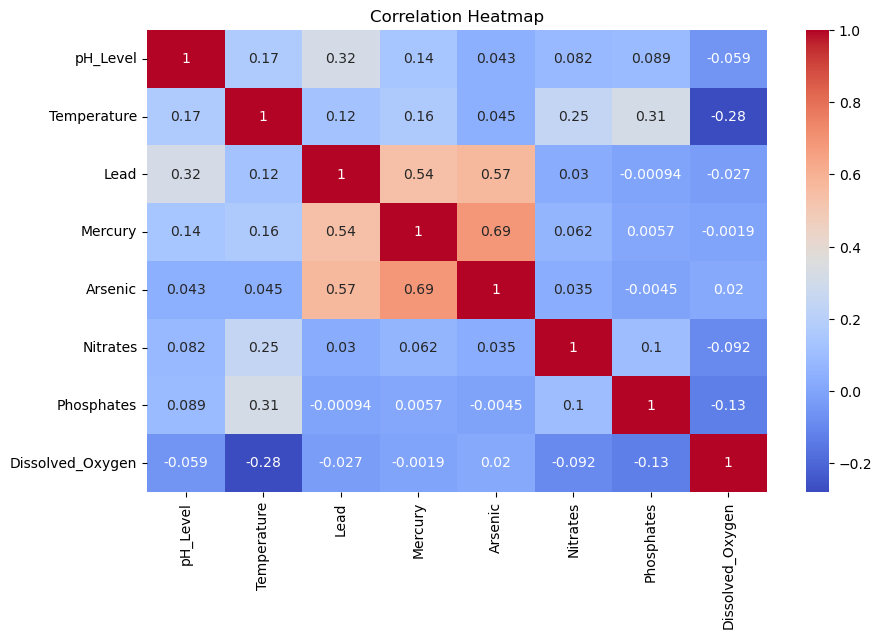

In [125]:
# Compute the correlation matrix using only numeric columns
corr_matrix = df[numeric_columns].corr()

# Generate a heatmap of correlations between different toxins and pH levels
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [257]:
# Perform a t-test to compare toxin levels between two major river systems (Lead)
amazon_data = df[df['River_System'] == 'Amazon']['Lead']
nile_data = df[df['River_System'] == 'Nile']['Lead']
t_stat, p_value = stats.ttest_ind(amazon_data, nile_data)

print(f"T-test between Amazon and Nile for Lead: T-statistic = {t_stat}, P-value = {p_value}")

T-test between Amazon and Nile for Lead: T-statistic = -20.23821779031797, P-value = 1.3375120881428663e-67


In [259]:
# Perform a t-test to compare toxin levels between two major river systems (Mercury)
amazon_data = df[df['River_System'] == 'Amazon']['Mercury']
nile_data = df[df['River_System'] == 'Nile']['Mercury']
t_stat, p_value = stats.ttest_ind(amazon_data, nile_data)

print(f"T-test between Amazon and Nile for Mercury: T-statistic = {t_stat}, P-value = {p_value}")

T-test between Amazon and Nile for Mercury: T-statistic = -23.138339129907983, P-value = 5.815283894855725e-82


In [261]:
# Perform a t-test to compare toxin levels between two major river systems (Arsenic)
amazon_data = df[df['River_System'] == 'Amazon']['Arsenic']
nile_data = df[df['River_System'] == 'Nile']['Arsenic']
t_stat, p_value = stats.ttest_ind(amazon_data, nile_data)

print(f"T-test between Amazon and Nile for Arsenic: T-statistic = {t_stat}, P-value = {p_value}")

T-test between Amazon and Nile for Arsenic: T-statistic = -21.353414036827935, P-value = 4.126879024932749e-73


In [181]:
# Linear Regression analysis for Lead toxin levels and pH
x = df[["pH_Level"]]
y = df['Lead']
model = LinearRegression()
model.fit(x, y)
print(f"Linear Regression Coefficients: {model.coef_}")
print(f"Linear Regression Intercept: {model.intercept_}")
    

Linear Regression Coefficients: [0.80294889]
Linear Regression Intercept: -2.893246694927762


In [249]:
# Linear Regression analysis for Mercury toxin levels and pH
x = df[["pH_Level"]]
y = df['Mercury']
model = LinearRegression()
model.fit(x, y)
print(f"Linear Regression Coefficients: {model.coef_}")
print(f"Linear Regression Intercept: {model.intercept_}")

Linear Regression Coefficients: [0.06906222]
Linear Regression Intercept: 0.08827690268859645


In [252]:
# Linear Regression analysis for Arsenic toxin levels and pH
x = df[["pH_Level"]]
y = df['Arsenic']
model = LinearRegression()
model.fit(x, y)
print(f"Linear Regression Coefficients: {model.coef_}")
print(f"Linear Regression Intercept: {model.intercept_}")

Linear Regression Coefficients: [0.12085581]
Linear Regression Intercept: 2.7092331689835634


# Insights from data

Lead toxin levels:
- Yangtze river has the highest average levels of lead toxin from 2018 to 2023
- Amazon river has the lowest average levels of lead toxin from 2018 to 2023
- The level of volality is high throughout the year meaning the levels for all 5 rivers are constantly changing

Mercury Toxin levels:
- Yangtze river has the highest average levels of Mercury Toxin from 2018 to 2023
- Danube river has the lowest average levels of Mercury Toxin from 2018 to 2023
- The level of volality is high throughout the year meaning the levels for all 5 rivers are constantly changing

Arsenic toxin levels:
- Yangtze river has the highest average levels of Arsenic Toxin from 2018 to 2023
- Danuabe river has the lowest average levels of Arsenic Toxin from 2018 to 2023
- The level of volality is high throughout the year meaning the levels for all 5 rivers are constantly changing

Correlation between toxins:
- The correlation heatmap shows Arsenic and Mercury having a positive relationship (0.69) as Mercury increases, Arsenic tends to increase too
- There is also a correlation between Lead and Mercury (0.54) aswell as Lead and Arsenic (0.57) with all of these rising together
- These toxins likely come from related poluttion sources
- There is also links between Temperature with all 3 of these toxins as well as pH levels
- Lead and pH level at 0.32 is positive which could be investigated further

T-tests
- There is very strong evidence that the average Lead concentrations in the Amazon and Nile rivers differ significantly
- There is a statistically significant difference in the average Mercury levels between the Amazon and Nile rivers
- The Arsenic levels in the Amazon and Nile rivers are significantly different
- All three toxins (Lead, Mercury, Arsenic) show highly significant differences in contamination levels between Amazon and Nile
- This means the difference in toxin levels between the two rivers is real and statistically significant, not just due to random chance
- The Nile river is more polluted with Lead, Mercury, and Arsenic than the Amazon
- The nile is potentially at a higher envionmental risk

Relationship Between pH and Toxin Levels:
- The positive coefficient (0.8) for Lead suggests that higher pH values correspond to higher Lead levels in the water
- Theres a weak positive relationship as Mercury levels tend to slightly increase as pH increases
- The effect size is smaller with Mercury compared to Lead at 0.069
- The positive relationship suggests that as water becomes less acidic (higher pH), Mercury concentration slightly rises
- There’s a small positive relationship between pH and Arsenic, levels tend to increase slightly as pH rises
- Overall, Lead shows the strongest increase as pH rises (0.80)
- Followed by Arsenic which is moderate (0.12)
- Mercury has the weakest association with pH out of the three toxins (0.069)